# Implementation of Simple Linear Regression and checking the Assumptions of Linear Regression

Here, I have used already cleaned data so that we can directly jump to modelling.

In [50]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [51]:
# importing data
data = pd.read_csv('train_cleaned.csv')
data.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0.016047,249.8092,1999,3735.1380,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,5.92,0.019278,48.2692,2009,443.4228,0,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
2,17.50,0.016760,141.6180,1999,2097.2700,0,1,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,19.20,0.000000,182.0950,1998,732.3800,0,0,1,0,0,...,0,0,0,0,0,1,1,0,0,0
4,8.93,0.000000,53.8614,1987,994.7052,0,1,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [52]:
# segregating independent and dependent variables
y = data['Item_Outlet_Sales']
x = data.drop(['Item_Outlet_Sales'], axis=1)
print(x.shape , y.shape)

(8523, 45) (8523,)


In [53]:
# splitting the data into train set and test set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y,\
                        test_size=0.2 , random_state = 28)

## Implementing Linear Regression

In [54]:
# import Linear regression and metric mean square error 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae

In [55]:
# creating instance of Linear Regression
lr = LinearRegression()

# fitting the model
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
# predicting over the rain set and calculating error
test_predict = lr.predict(x_test)
k = mae(test_predict, y_test)
print('Test Mean Absolute Error ',k)

Test Mean Absolute Error  823.9250049160775


## Parameters of Linear Regression

In [57]:
lr.coef_

array([-2.40310194e+00, -2.56585355e+02,  1.55421206e+01, -1.86634820e+01,
       -2.27614181e+01, -1.79596992e+01,  2.81372883e+01,  1.74444548e+01,
       -4.86062583e+00,  1.17329029e+01,  3.73300665e+01, -6.63051080e+01,
        1.71069811e+01, -6.73092257e+01, -8.23147926e+00, -8.38597258e+00,
       -3.71576125e+01,  8.42985577e-01, -6.39011253e+01,  2.66488306e+01,
       -3.29371251e+00,  1.01819523e+02,  7.87931515e+00, -4.28650632e+01,
        9.40886940e+01, -4.86104982e+02, -4.42197869e+01,  1.54478794e+02,
       -4.06615154e+01, -4.74374541e+02,  5.96027424e+02,  1.51705223e+02,
       -1.00794210e+02,  3.08812111e+02, -6.48685173e+01, -4.42197869e+01,
        4.90497391e+02, -1.38572066e+01, -2.30430947e+02,  2.05389807e+02,
        2.50411398e+01, -9.60479522e+02,  4.05113614e+02, -4.06615154e+01,
        5.96027424e+02])

## Plotting the coefficients 

Text(0.5, 1.0, 'Coefficient plot')

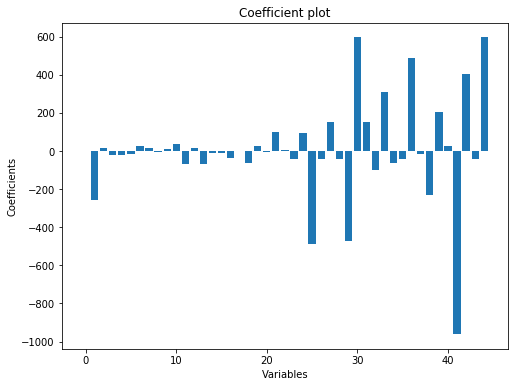

In [58]:
plt.figure(figsize=(8,6))
x = range(len(x_train.columns))
y = lr.coef_
plt.bar(x, y )
plt.xlabel("Variables")
plt.ylabel("Coefficients")
plt.title("Coefficient plot")

Here we can see that the model depends upon some independent variables too much. But these coefficients are not suitable for interpretation because these are not scaled, therefore we will perform the interpretation later.

## Checking assumptions of Linear Model

In [59]:
# Arranging and calculating the Residuals 
residuals = pd.DataFrame({'actual values' : y_test , \
                         'predicted values' : test_predict})

residuals['residuals'] = residuals['actual values'] - \
                         residuals['predicted values']

residuals.head()

,actual values,predicted values,residuals
8482,763.0068,1779.828461,-1016.821661
907,445.4202,2439.241850,-1993.821650
2817,243.6828,734.117814,-490.435014
6922,826.9236,680.592042,146.331558
2413,171.7764,1122.205618,-950.429218


In [60]:
y_test.shape

(1705,)

## Plotting residual curve ( Is there constant Variance or Heteroscedastic ? )

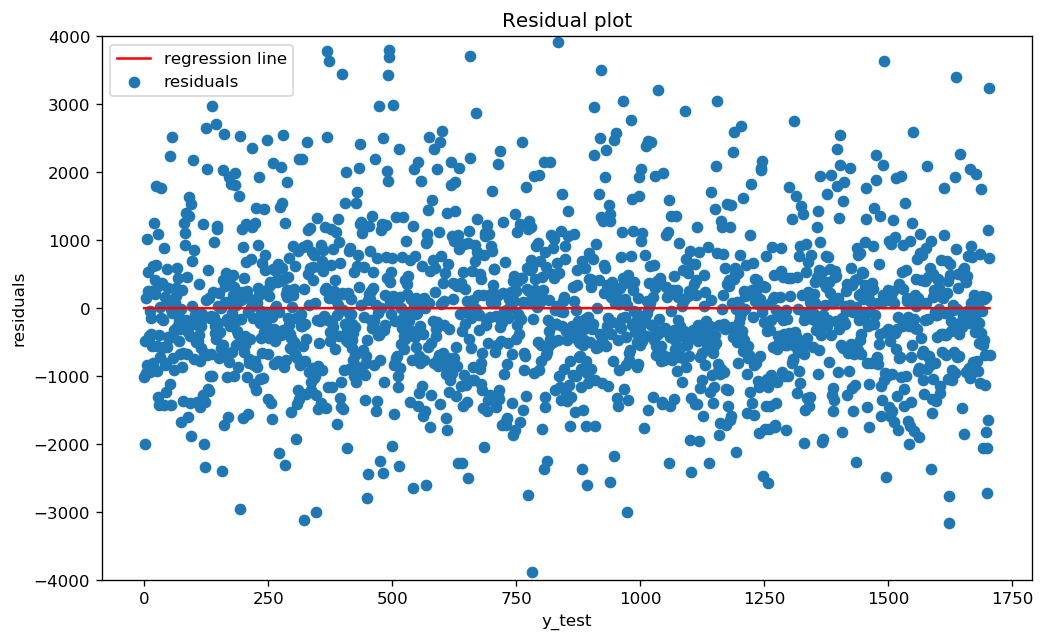

In [61]:
plt.figure(figsize = (10,6) , dpi = 120)
f = range(0,1705)
k = [0 for i in range(0,1705)]
plt.scatter(f,residuals.residuals[:], label='residuals')
plt.plot(f,k,color = 'red', label = 'regression line')
plt.xlabel('y_test')
plt.ylabel('residuals')
plt.title('Residual plot')
plt.ylim(-4000,4000)
plt.legend()

The residual plot clearly doesn't have any pattern and it is uniformly scattered around the regression line. Hence, independent variables are linearly related to dependent variable.
Also, there is constant variance in the residuals. Hence, the data is homoscedastic.

## Checking Distribution of Residuals 

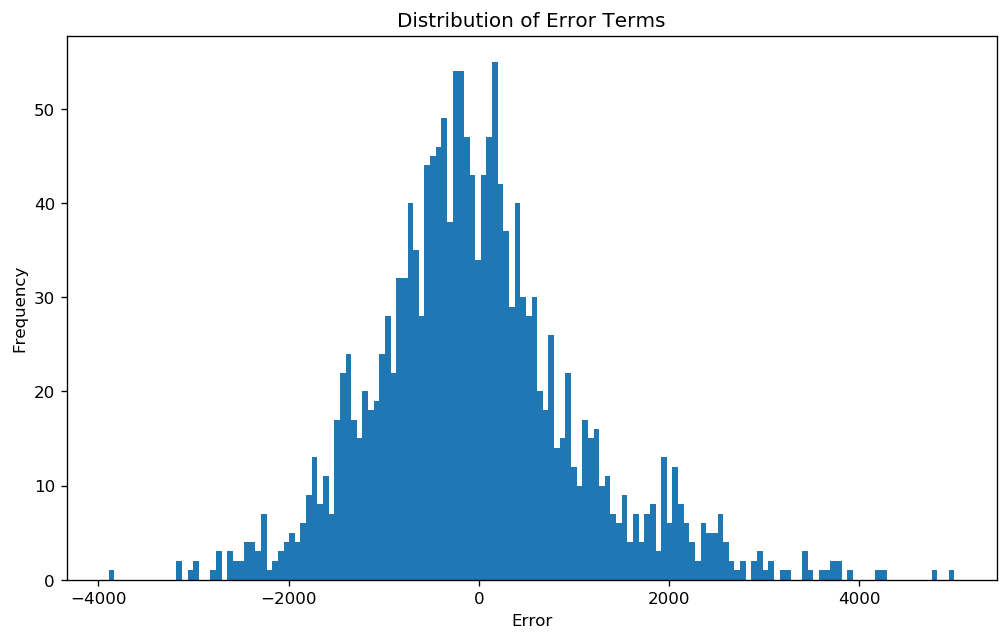

In [62]:
# Histogram for distribution
plt.figure(figsize=(10,6), dpi=120)
plt.hist(residuals.residuals, bins = 150)
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.title('Distribution of Error Terms')
plt.show()

According to the histogram, the distribution of error is nearly normal. But there are some outliers on the higher end of the errors.

# QQ-Plot ( Is the data Normally Distributed? )

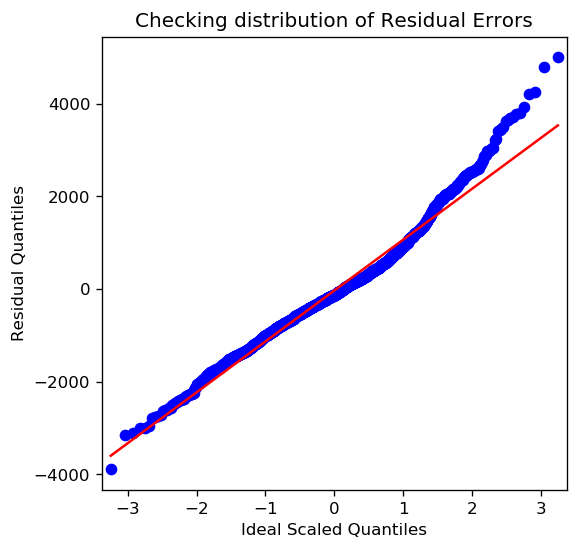

In [63]:
# importing the QQ-plot from the statsmodels
from statsmodels.graphics.gofplots import qqplot

## plotting the QQ plot
fig, ax = plt.subplots(figsize=(5,5), dpi=120)
qqplot(residuals.residuals, line='s', ax = ax)
plt.ylabel('Residual Quantiles')
plt.xlabel('Ideal Scaled Quantiles')
plt.title('Checking distribution of Residual Errors')
plt.show()

<p>The QQ-plot clearlyverifies our findings from the histogram of the residuals, the data is mostly normal in nature, but there are some outliers on the higher end of the residuals.</p>

## Variance Inflation Factor (VIF) (Checking for multicollinearity)

In [64]:
data.dtypes
# to observe the continuous and categorical variable

Item_Weight                        float64
Item_Visibility                    float64
Item_MRP                           float64
Outlet_Establishment_Year            int64
Item_Outlet_Sales                  float64
Item_Fat_Content_LF                  int64
Item_Fat_Content_Low Fat             int64
Item_Fat_Content_Regular             int64
Item_Fat_Content_low fat             int64
Item_Fat_Content_reg                 int64
Item_Type_Baking Goods               int64
Item_Type_Breads                     int64
Item_Type_Breakfast                  int64
Item_Type_Canned                     int64
Item_Type_Dairy                      int64
Item_Type_Frozen Foods               int64
Item_Type_Fruits and Vegetables      int64
Item_Type_Hard Drinks                int64
Item_Type_Health and Hygiene         int64
Item_Type_Household                  int64
Item_Type_Meat                       int64
Item_Type_Others                     int64
Item_Type_Seafood                    int64
Item_Type_S

In [65]:
# importing variance_inflation_factor function from the Statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Calculating VIF for every column (only works for the non categorical feature)
VIF = pd.Series([variance_inflation_factor(data.values , i) for i in range(data.shape[1])], index = data.columns)
VIF

C:\Users\DELL\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Item_Weight                        2.349925
Item_Visibility                    1.101456
Item_MRP                           1.753170
Outlet_Establishment_Year               inf
Item_Outlet_Sales                  2.292720
Item_Fat_Content_LF                     inf
Item_Fat_Content_Low Fat                inf
Item_Fat_Content_Regular                inf
Item_Fat_Content_low fat                inf
Item_Fat_Content_reg                    inf
Item_Type_Baking Goods                  inf
Item_Type_Breads                        inf
Item_Type_Breakfast                     inf
Item_Type_Canned                        inf
Item_Type_Dairy                         inf
Item_Type_Frozen Foods                  inf
Item_Type_Fruits and Vegetables         inf
Item_Type_Hard Drinks                   inf
Item_Type_Health and Hygiene            inf
Item_Type_Household                     inf
Item_Type_Meat                          inf
Item_Type_Others                        inf
Item_Type_Seafood               

From this list, we clearly see that there happens to be no independent variable over the value of 5, which means that there are no features that exhibit the multicollinearity in the dataset. Note that VIF only works for the continuous variables.

## Model Interpretability
So far we have simply been predicting the values using the linear regression. But in order to interpret the model, the normalising of the data is essential.

In [66]:
# Creating instamce of Linear Regression
lr = LinearRegression(normalize = True)

# Fitting the model
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [67]:
# Predicting over the train set and calculating error
y_train_pred = lr.predict(x_train)
k = mae(y_train, y_train_pred)
print('Training Mean Absolute Error ',k)

Training Mean Absolute Error  838.3586062775007


In [68]:
# Predicting over the tet set and calculating error
y_test_pred = lr.predict(x_test)
k = mae(y_test,y_test_pred)
print('Testing Mean Absolute Error ',k)

Testing Mean Absolute Error  822.6152319061583


Text(0.5, 1.0, 'Normalised Coefficient plot')

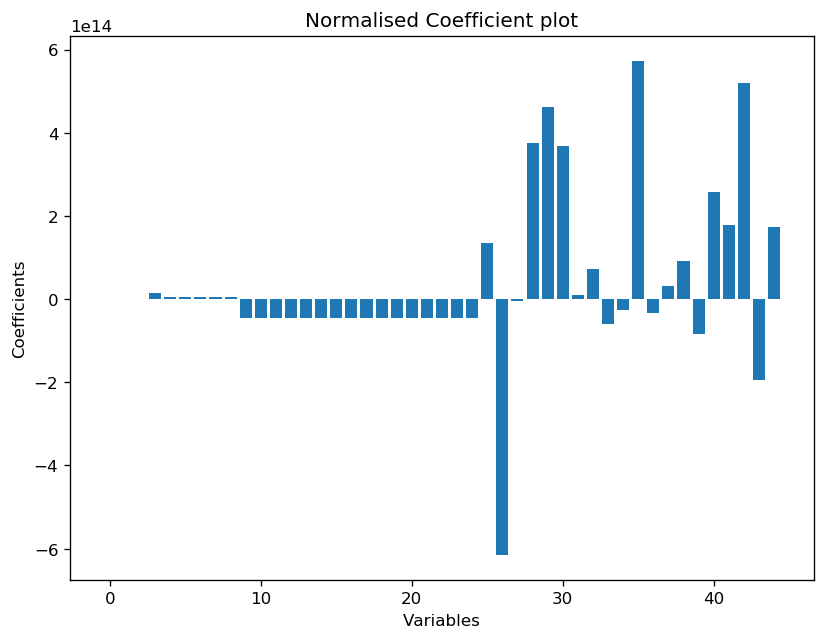

In [69]:
plt.figure(figsize=(8,6), dpi=120)
x = range(len(x_train.columns))
y = lr.coef_
plt.bar(x,y)
plt.xlabel("Variables")
plt.ylabel("Coefficients")
plt.title("Normalised Coefficient plot")

Now the coefficients we see are normalised and we can easily make final inferences out of it.

Here we can see that there are a lot of coefficients which are near to zero and not significant. So let us try removing them and build the model again.

### Creating new subsets of data

In [70]:
# separating independent and dependent variables
x = data.drop(['Item_Outlet_Sales'],axis=1)
y = data['Item_Outlet_Sales']
print(x.shape, y.shape)

(8523, 45) (8523,)


### Arranging coefficients with features

In [71]:
Coefficients = pd.DataFrame({
    'Variable' : x.columns,\
    'coefficient' : lr.coef_
})
Coefficients.head()

,Variable,coefficient
0,Item_Weight,-2.383211e+00
1,Item_Visibility,-2.570279e+02
2,Item_MRP,1.554086e+01
3,Outlet_Establishment_Year,1.506428e+13
4,Item_Fat_Content_LF,3.944836e+12


### Choosing variables with significance greater than 0.5 (Filtering significant features )

In [72]:
sig_var = Coefficients[Coefficients.coefficient > 1.0]

### Extracting the significant subset 

In [73]:
subset = data[sig_var['Variable'].values]
subset.head()

,Item_MRP,Outlet_Establishment_Year,Item_Fat_Content_LF,Item_Fat_Content_Low Fat,Item_Fat_Content_Regular,Item_Fat_Content_low fat,Item_Fat_Content_reg,Outlet_Identifier_OUT010,Outlet_Identifier_OUT018,Outlet_Identifier_OUT019,Outlet_Identifier_OUT027,Outlet_Identifier_OUT035,Outlet_Identifier_OUT045,Outlet_Size_High,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type3
0,249.8092,1999,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,48.2692,2009,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
2,141.6180,1999,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0
3,182.0950,1998,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0
4,53.8614,1987,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0


### Splitting the data into train set and the test set

In [74]:
x_train, x_test, y_train, y_test = train_test_split(subset,y,\
                                    random_state=28 )

### Implementing Linear Regression

In [75]:
# Creating the instance of Linear Regression with normalised data
lr = LinearRegression(normalize = True)

# fitting the model
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [76]:
# Predicting over the train set and calculating error 
train_pred = lr.predict(x_train)
k = mae(y_train,train_pred)
print('Training Mean Absolute Error ', k)

Training Mean Absolute Error  843.0417873904881


In [77]:
# predicting over the test set and calculating error
test_predict = lr.predict(x_test)
k = mae(y_test,test_predict)
print('Test Mean Absolute Error ', k)

Test Mean Absolute Error  820.1219593618018


Text(0.5, 1.0, 'Normalized Coefficient plot')

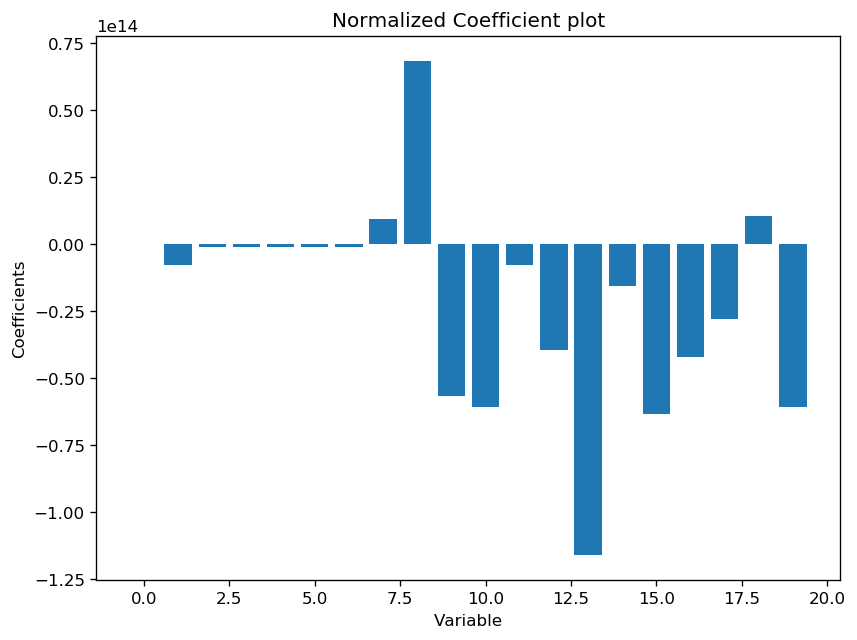

In [78]:
plt.figure(figsize=(8,6),dpi=120)
x = range(len(x_train.columns))
y = lr.coef_
plt.bar(x,y)
plt.xlabel("Variable")
plt.ylabel("Coefficients")
plt.title('Normalized Coefficient plot')